# Surprise Housing Assignment
### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company wants to know:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

**Business Goal** is to model the price of houses with the available indepenent variables.This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### 1. Data understanding
Read the data

In [221]:
%autosave 120

# Let's import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

Autosaving every 120 seconds


In [222]:
house_data = pd.read_csv("train.csv")
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [223]:
#Check number of rows and columns in the data
house_data.shape

(1460, 81)

In [224]:
#Check if any data is null
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Observation**

We have 3 float type, 35 int and 43 object type.and we see that there are some columns with null values.
Let's list the null columns

In [225]:
house_data.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [226]:
# all numeric (float and int) variables in the dataset
house_numeric = house_data.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [227]:
# dropping symboling and car_ID 
house_numeric = house_numeric.drop(['Id'], axis=1)
house_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [228]:
# correlation matrix
cor = house_numeric.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


Note the correlation between LotFrontage and SalePrice is 0.351799.
We will use this obseravation in deciding if the missing value needs to be deleted for LotFrontage


In [229]:
print('Columns with some value as null : \n')
print(house_data.columns[house_data.isnull().any()])
print('\n\nNumber of columns with some value as null : ' +str(len(house_data.columns[house_data.isnull().any()])))

Columns with some value as null : 

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


Number of columns with some value as null : 19


In [230]:
#Identifing columns with null values more than 75% of the total records
print(house_data.columns[house_data.isnull().mean() > 0.75])

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [231]:
#If we change null value %, we will see that the above columns lie between 48 to 80 %, so we are covering null values more than 48%, which will make the model robust
print(house_data.columns[house_data.isnull().mean() > 0.48])
print(house_data.columns[house_data.isnull().mean() > 0.80])

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')
Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


### 2. Preparation and EDA

By looking at the definition of each column -

1. *Alley* - NA means no access to to Alley, so we will <font color='blue'>replace NA with NoAccess</font>, so not to confuse with missing data
2. *PoolQC* - Again, we have information here, its not missing. <font color='blue'>replace NA with NoPool.</font>
3. *Fence* - Same here, NA means no fence (no offense to the null values ;) ) <font color='blue'>replace NA with NoFence</font>
4. *MiscFeature* - NA means the house has no other Miscelleneous features, not that the value is missing. <font color='blue'>replace NA with None</font>

This concludes that we actually do not have any missing values more than 48%.

**Lets check other missing values** irrespective of %, we can rename the values if they are actually not missing like we plan to do for above 4.

5. *LotFrontage* - Its not a category, so looks like the value is actually missing.We will have to <font color='blue'>compute and replace</font> it, cannot remove them they are 17%. The column represents the  Linear feet of street connected to property. It seems to be dependent on the Area of the Lot. We will use it for the computation.
6. *MasVnrType* - We have 8 missing values here as NA, since we cannot predict its type, we can <font color='blue'>drop these 8</font> (0.54% of our data)
7. *MasVnrArea* - The same 8 above have Masonary Veneer area as NA, they will get dropped too.
Here 5 records with MasVnrType=None, have an area <> 0. This seems incorrect because if there is no Masonary Veneer, there should not be any area, we will <font color='blue'>replace these 5 with 0</font>

8. *BsmtQual* - Here NA means noBasement, so its not a missing value. <font color='blue'>replace NA with NoBsmnt.</font>
9. *BsmtCond* - Same here, NA means no Basement. <font color='blue'>replace NA with NoBsmnt.</font>
10. *BsmtExposure* - Same here, NA means no Basement. <font color='blue'>replace NA with NoBsmnt.</font>
11. *BsmtFinType1* - NA means no Basement. <font color='blue'>replace NA with NoBsmnt.</font>
12. *BsmtFinType2* - NA means no Basement <font color='blue'>replace NA with NoBsmnt </font>
Here one case where its NA, the value of BsmtFinSF2 <> 0, if we see the corresponding value of BsmtFinType1, its not NA. That means there is a basement and NA is incorrect here. We will <font color='blue'>drop this 1 row</font> too as its difficult to predict a correct value.
13. *Electrical* - One row with NA, we will <font color='blue'>drop it</font>
14. *FireplaceQu* - NA means no fireplace, so its not a missing value. <font color='blue'>replace NA with NoFirePlace</font>
15. *GarageType* - NA means no Garage, so its not a missing value. <font color='blue'>replace NA with NoGarage</font>
16. *GarageYrBlt* - All the NAs are because there is no Garage. We will <font color='blue'>replace it with some other numeric value -2050</font> (future date would suggest its not there)
17. *GarageFinish* - NA means no Garage. <font color='blue'>replace NA with NoGarage</font>
18. *GarageQual* - NA means no Garage. <font color='blue'>replace NA with NoGarage</font>
19. *GarageCond* - NA means no Garage. <font color='blue'>replace NA with NoGarage</font>

In [232]:
# Drop rows as per #6 and #13: NAs from MasVnrType and Electrical
print('Before dropping : ')
print(house_data.shape)
    
house_data.dropna(subset =['MasVnrType','Electrical'], inplace=True)
print('\nAfter dropping : ')
print(house_data.shape)

Before dropping : 
(1460, 81)

After dropping : 
(1451, 81)


In [233]:
# Drop rows as per #12: BsmtFinType2 = NA and BsmtFinType1 != NA
print('Before dropping : ')
print(house_data.shape)
house_data.drop(house_data[(house_data.BsmtFinType2.isna()) & (house_data.BsmtFinType1.notna())].index, inplace=True)
print('\nAfter dropping : ')
print(house_data.shape)


Before dropping : 
(1451, 81)

After dropping : 
(1450, 81)


In [234]:
# Replace NA in GarageYrBlt with 2050 as per #16
print('GarageYrBlt NA before repalce : ')
print(house_data.GarageYrBlt.isna().sum())
print('GarageYrBlt 2050 before repalce  : ')
print(house_data.GarageYrBlt[house_data.GarageYrBlt == 2050].count())
house_data.GarageYrBlt.fillna(2050, inplace=True)
print('\n\nGarageYrBlt NA after repalce : ')
print(house_data.GarageYrBlt.isna().sum())
print('GarageYrBlt 2050 after repalce  : ')
print(house_data.GarageYrBlt[house_data.GarageYrBlt == 2050].count())

GarageYrBlt NA before repalce : 
81
GarageYrBlt 2050 before repalce  : 
0


GarageYrBlt NA after repalce : 
0
GarageYrBlt 2050 after repalce  : 
81


In [235]:
# Replace MasVnrArea with 0 where MasVnrType=None as per #7
print('MasVnrArea before replace: ')
print(house_data.MasVnrArea[(house_data.MasVnrArea != 0) & (house_data.MasVnrType=='None')])

#replace using index
for i in house_data.MasVnrArea[(house_data.MasVnrArea != 0) & (house_data.MasVnrType=='None')].index:
    house_data.MasVnrArea[i] = 0
    print('MasVnrArea after replace for index: '+str(i))
    print(house_data.MasVnrArea[i])

MasVnrArea before replace: 
624     288.0
773       1.0
1230      1.0
1300    344.0
1334    312.0
Name: MasVnrArea, dtype: float64
MasVnrArea after replace for index: 624
0.0
MasVnrArea after replace for index: 773
0.0
MasVnrArea after replace for index: 1230
0.0
MasVnrArea after replace for index: 1300
0.0
MasVnrArea after replace for index: 1334
0.0


In [236]:
dict={
'Alley':'NoAccess',
'PoolQC':'NoPool',
'Fence':'NoFence',
'MiscFeature':'None',
'BsmtQual':'NoBsmnt',
'BsmtCond':'NoBsmnt',
'BsmtExposure':'NoBsmnt',
'BsmtFinType1':'NoBsmnt',
'BsmtFinType2':'NoBsmnt',
'FireplaceQu':'NoFirePlace',
'GarageType':'NoGarage',
'GarageFinish':'NoGarage',
'GarageQual':'NoGarage',
'GarageCond':'NoGarage'
}
for i in dict:
    #print(i+dict[i])
    print('Count of NA in '+i+' before replace : ' + str(house_data[i].isna().sum()))
    print('Count of '+dict[i]+'  in '+i+' before replace : ' + str(house_data[i][house_data[i] == dict[i]].count()))
    house_data[i].fillna(dict[i], inplace=True)
    print('Count of NA in '+i+' after replace : ' + str(house_data[i].isna().sum()))
    print('Count of '+dict[i]+'  in '+i+' after replace : ' + str(house_data[i][house_data[i] == dict[i]].count()))
    print('\n\n')

house_data.shape

Count of NA in Alley before replace : 1360
Count of NoAccess  in Alley before replace : 0
Count of NA in Alley after replace : 0
Count of NoAccess  in Alley after replace : 1360



Count of NA in PoolQC before replace : 1443
Count of NoPool  in PoolQC before replace : 0
Count of NA in PoolQC after replace : 0
Count of NoPool  in PoolQC after replace : 1443



Count of NA in Fence before replace : 1169
Count of NoFence  in Fence before replace : 0
Count of NA in Fence after replace : 0
Count of NoFence  in Fence after replace : 1169



Count of NA in MiscFeature before replace : 1396
Count of None  in MiscFeature before replace : 0
Count of NA in MiscFeature after replace : 0
Count of None  in MiscFeature after replace : 1396



Count of NA in BsmtQual before replace : 37
Count of NoBsmnt  in BsmtQual before replace : 0
Count of NA in BsmtQual after replace : 0
Count of NoBsmnt  in BsmtQual after replace : 37



Count of NA in BsmtCond before replace : 37
Count of NoBsmnt  in BsmtCond b

(1450, 81)

Before we find the value of LotFrontage, lets convert our data into numeric for further analysis

In [237]:
#Check the stats for numeric columns
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1450.000000,1450.000000,1193.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,...,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000
mean,729.647586,56.958621,70.015088,10507.706897,6.092414,5.580000,1971.070345,1984.746897,102.971724,441.804828,...,94.477931,46.454483,21.967586,3.433103,15.164828,2.777931,43.788966,6.316552,2007.814483,180552.808276
std,421.754746,42.353857,24.305621,9996.433973,1.381035,1.113695,30.189039,20.652271,180.903464,455.173950,...,125.455597,66.071680,61.126584,29.416948,55.935396,40.315051,497.818831,2.699552,1.329471,79292.967382
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.250000,20.000000,59.000000,7536.250000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,729.500000,50.000000,69.000000,9470.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,381.000000,...,0.000000,24.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162250.000000
75%,1094.750000,70.000000,80.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,163.750000,706.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213875.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [238]:
#Drop unnecessary column - Id, its just a sequence number
house_data.drop(["Id"], axis = 1, inplace = True)
house_data.shape

(1450, 80)

Before we fix the NAs in LotFrontage, lets convert the variables to numerical values to see any realtion between LotFrontage and other variables.
### Covert data to numerical

**A. Categorical with 0 and 1s**
    <br>1. Street
    <br>2. Utilities *Only AllPub and NoSeWa is available in the data*
    <br>3. CentralAir

**B. Categorical ordinal**
    <br>1. LotShape
    <br>2. LandContour
    <br>3. LandSlope
    <br>4. ExterQual
    <br>5. ExterCond
    <br>6. HeatingQC
    <br>7. KitchenQual
    <br>8. Functional
    

**C. Categorical nominal (dummy)**
    <br>1. MSZoning - *before converting we will <font color = 'blue'>replace C(all) to C</font>, so its consistent with Data Dictionary*
    <br>2. Alley
    <br>3. LotConfig
    <br>4. Neighborhood - *We will also <font color='blue'>create another variable</font> by checking how far the given neighbor is from Ames City*
    <br>5. Condition1
    <br>6. Condition2 - <font color='blue'>*create another variable</font> for number of Norm (Normal) conditions*
    <br>7. BldgType
    <br>8. HouseStyle
    <br>9. RoofStyle
    <br>10. RoofMatl
    <br>11. Exterior1st
    <br>12. Exterior2nd - *Similar to Conditions, let's <font color='blue'>create another variable</font> for number of Other Exteriors*
    <br>13. MasVnrType
    <br>14. Foundation
    <br>15. BsmtQual - *Becase of No Basement data, consdidering it nonimal, otherwise it could have been ordinal. Similarly for other such cases*
    <br>16. BsmtCond
    <br>17. BsmtExposure
    <br>18. BsmtFinType1
    <br>19. BsmtFinType2
    <br>20. Heating
    <br>21. Electrical
    <br>22. FireplaceQu
    <br>23. GarageType
    <br>24. GarageFinish
    <br>25. GarageQual
    <br>26. GarageCond
    <br>27. PavedDrive
    <br>28. PoolQC
    <br>29. Fence
    <br>30. MiscFeature
    <br>31. SaleType
    <br>32. SaleCondition
    
    
 Out of 43 Object types, we have classified 3-binary , 8 -ordinal and 32-nominal categorical variables.
    


In [239]:
#Binary conversion as per #A

binary_var_list = ['Street','Utilities','CentralAir']

print('\n\n***********Data Before converting to numeric :**********\n\n')
print(house_data[binary_var_list].head(5))
print('\n')
for i in binary_var_list:
    print('Data type of '+i +' is '+ str(house_data[i].dtypes))

#print(house_data['Street'].dtypes)
# applying the function to the housing variables list
house_data['Street'] = house_data['Street'].apply(lambda x: 0 if x == 'Grvl' else 1 )
house_data['Utilities'] = house_data['Utilities'].apply(lambda x: 0 if x == 'AllPub' else 1 )
house_data['CentralAir'] = house_data['CentralAir'].apply(lambda x: 0 if x == 'N' else 1 )

print('\n\n***********Data After converting to numeric :**********\n\n')
print(house_data[binary_var_list].head(5))
print('\n')
for i in binary_var_list:
    print('Data type of '+i +' is '+ str(house_data[i].dtypes))



***********Data Before converting to numeric :**********


  Street Utilities CentralAir
0   Pave    AllPub          Y
1   Pave    AllPub          Y
2   Pave    AllPub          Y
3   Pave    AllPub          Y
4   Pave    AllPub          Y


Data type of Street is object
Data type of Utilities is object
Data type of CentralAir is object


***********Data After converting to numeric :**********


   Street  Utilities  CentralAir
0       1          0           1
1       1          0           1
2       1          0           1
3       1          0           1
4       1          0           1


Data type of Street is int64
Data type of Utilities is int64
Data type of CentralAir is int64


In [240]:
#Ordinal conversion as per #B

#First Define the mapping for string value to numerical  value
dict={
    'LotShape':{
        'Reg':4,
        'IR1':3,
        'IR2':2,
        'IR3':1},
    'LandContour':{
        'Lvl':4,
        'Bnk':3,
        'HLS':2,
        'Low':1},
    'LandSlope':{
        'Gtl':3,
        'Mod':2,
        'Sev':1},
    'ExterQual':{
        'Ex':5,
        'Gd':4,
        'TA':3,
        'Fa':2,
        'Po':1},
    'ExterCond':{
        'Ex':5,
        'Gd':4,
        'TA':3,
        'Fa':2,
        'Po':1},
    'HeatingQC':{
        'Ex':5,
        'Gd':4,
        'TA':3,
        'Fa':2,
        'Po':1},
    'KitchenQual':{
        'Ex':5,
        'Gd':4,
        'TA':3,
        'Fa':2,
        'Po':1},
    'Functional':{
        'Typ':8,
        'Min1':7,
        'Min2':6,
        'Mod':5,
        'Maj1':4,
        'Maj2':3,
        'Sev':2,
        'Sal':1}    
}



    
# The for each field replace as per the dictionary mapping

for i in dict:
    print('\nData Before converting to numeric :')
    print(house_data[i].head(2))
    
    house_data[i] = house_data[i].apply(lambda x: dict[i][x])
    print('\nData After converting to numeric :')
    print(house_data[i].head(2))
    print('****************************************')


Data Before converting to numeric :
0    Reg
1    Reg
Name: LotShape, dtype: object

Data After converting to numeric :
0    4
1    4
Name: LotShape, dtype: int64
****************************************

Data Before converting to numeric :
0    Lvl
1    Lvl
Name: LandContour, dtype: object

Data After converting to numeric :
0    4
1    4
Name: LandContour, dtype: int64
****************************************

Data Before converting to numeric :
0    Gtl
1    Gtl
Name: LandSlope, dtype: object

Data After converting to numeric :
0    3
1    3
Name: LandSlope, dtype: int64
****************************************

Data Before converting to numeric :
0    Gd
1    TA
Name: ExterQual, dtype: object

Data After converting to numeric :
0    4
1    3
Name: ExterQual, dtype: int64
****************************************

Data Before converting to numeric :
0    TA
1    TA
Name: ExterCond, dtype: object

Data After converting to numeric :
0    3
1    3
Name: ExterCond, dtype: int64
********

#### Dummy variables
We will convert the categorical values above to dummy variables as per #C. There will be k-1, where k i categorical levels.

In [241]:
#Replace C (all) with C for MSZoning
print(house_data['MSZoning'].value_counts())
house_data['MSZoning']=house_data['MSZoning'].apply(lambda x : 'C' if x == 'C (all)' else x)
print(house_data['MSZoning'].value_counts())

RL         1144
RM          218
FV           62
RH           16
C (all)      10
Name: MSZoning, dtype: int64
RL    1144
RM     218
FV      62
RH      16
C       10
Name: MSZoning, dtype: int64


In [242]:
# Checkig if we can create a new varaiable as per the distance of Neighborhood from Ames city as per #C4

#List all neighbourhoods
print(house_data.Neighborhood.unique())
house_data.Neighborhood.value_counts().count()

['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


25


By searching over the internet, it appears the <font color='red'>cities are in USA not Australia</font>. And its difficutlt to get the right neighbourhood, so we will <font color='blue'>drop the idea of creating new variable</font> for this case.

In [243]:
## Creating New variable based on Condition1 and Condition2 and assign value, as per #C6
# NormCondition - 2 (both norm), 1 (only 1 norm), 0 (none is norm)

#initialising the new columns via int type column
house_data['NormCondition']=house_data['MSSubClass']

house_data=house_data.reset_index()

for i in range(len(house_data)):
    if(house_data['Condition1'][i] != 'Norm' and house_data['Condition2'][i] != 'Norm'):
        house_data['NormCondition'][i]=0
    else:
        if(house_data['Condition1'][i] != 'Norm' and house_data['Condition2'][i] == 'Norm'):
            house_data['NormCondition'][i]=1
        else:
            house_data['NormCondition'][i]=2


In [244]:
house_data.drop('index',axis=1, inplace=True)

In [245]:
house_data.shape

(1450, 81)

In [246]:
house_data['NormCondition'].value_counts()

2    1250
1     185
0      15
Name: NormCondition, dtype: int64

In [247]:
house_data['NormCondition']

0       2
1       1
2       2
3       2
4       2
5       2
6       2
7       1
8       1
9       0
10      2
11      2
12      2
13      2
14      2
15      2
16      2
17      2
18      1
19      2
20      2
21      2
22      2
23      2
24      2
25      2
26      2
27      2
28      2
29      0
30      1
31      2
32      2
33      2
34      2
35      2
36      2
37      2
38      2
39      2
40      2
41      2
42      2
43      2
44      2
45      2
46      2
47      2
48      2
49      2
50      2
51      2
52      1
53      2
54      2
55      2
56      2
57      2
58      2
59      2
60      1
61      2
62      2
63      0
64      2
65      2
66      1
67      2
68      1
69      2
70      2
71      2
72      2
73      2
74      2
75      2
76      2
77      2
78      2
79      2
80      2
81      2
82      2
83      2
84      2
85      2
86      2
87      2
88      0
89      2
90      2
91      2
92      2
93      2
94      2
95      2
96      2
97      2
98      2
99      2


In [248]:
## Creating New variable based on Exterior1st and Exterior2nd - Similar to Conditions, #C12
# OtherExteriors - 2 (both Other), 1 (only 1 Other), ,0 (none is other)

house_data['OtherExteriors']=house_data['Exterior1st']

for i in range(len(house_data)):
    if(house_data['Exterior1st'][i] != 'Other' and house_data['Exterior2nd'][i] != 'Other'):
        house_data['OtherExteriors'][i]=0
    else:
        if(house_data['Exterior1st'][i] != 'Other' and house_data['Exterior2nd'][i] == 'Other'):
            house_data['OtherExteriors'][i]=1
        else:
            house_data['OtherExteriors'][i]=2

house_data['OtherExteriors'].value_counts()

0    1449
1       1
Name: OtherExteriors, dtype: int64

As we see there is only one case with Other, so there is not much value in creating this variable, we will drop it.

In [249]:
house_data.drop(['OtherExteriors'],axis=1, inplace=True)

In [250]:

# Store the 32 variables in a list and create its dummies
d_list=\
['MSZoning',
'Alley',
'LotConfig',
'Neighborhood',
'Condition1',
'Condition2',
'BldgType',
'HouseStyle',
'RoofStyle',
'RoofMatl',
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'Foundation',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'Heating',
'Electrical',
'FireplaceQu',
'GarageType',
'GarageFinish',
'GarageQual',
'GarageCond',
'PavedDrive',
'PoolQC',
'Fence',
'MiscFeature',
'SaleType',
'SaleCondition']

In [251]:
#keep list of columns which are not binary or dummy. This will be needed later for Min Max scaling
list_scaling_vars=house_data.drop(d_list, axis=1)
list_scaling_vars=list_scaling_vars.drop(['Street','Utilities','CentralAir'], axis =1)
list_scaling_vars=list_scaling_vars.columns
len(list_scaling_vars)

46

In [252]:

print('Shape before coverting to Dummy : '+str(house_data.shape))
# Drop first column - Clear
house_data_dummy = pd.get_dummies(house_data[d_list], drop_first = True)
print('\nShape of Dummy data : '+str(house_data_dummy.shape))

# Lets add these columns to the main dataframe
house_data = pd.concat([house_data, house_data_dummy], axis =1)
print('\nShape after coverting to Dummy : '+str(house_data.shape))

Shape before coverting to Dummy : (1450, 81)

Shape of Dummy data : (1450, 192)

Shape after coverting to Dummy : (1450, 273)


In [253]:
#Drop the categorical columns as we created dummy columns for them
house_data.drop(d_list,axis=1, inplace = True)
house_data.shape

(1450, 241)

In [254]:
house_data.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,1,4,4,0,3,7,5,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,1,4,4,0,3,6,8,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,1,3,4,0,3,7,5,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,1,3,4,0,3,7,5,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,1,3,4,0,3,8,5,...,0,0,0,0,1,0,0,0,1,0


In [255]:
print(house_data.dtypes.value_counts())
print(house_data.shape)
# No object types below

uint8      192
int64       46
float64      3
dtype: int64
(1450, 241)


In [256]:
house_data.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,1,4,4,0,3,7,5,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,1,4,4,0,3,6,8,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,1,3,4,0,3,7,5,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,1,3,4,0,3,7,5,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,1,3,4,0,3,8,5,...,0,0,0,0,1,0,0,0,1,0


### LotFrontage Missing values
There are 257 missing values which account to 17% of the data. And we saw earlier that there is strong correlation between LotFrontage and SalePrice
It's going to take some effort but its important to get the right values. So we will first build a model for LotFrontage

We will use the data without the missing values to create a regression model and then use it on the missing values.

In [257]:
#Create data set without the missing values
house_data_Lfrontage=house_data.dropna(subset='LotFrontage')
house_data_Lfrontage.shape
df_train, df_test = train_test_split(house_data_Lfrontage, train_size = 0.7, test_size = 0.3, random_state = 100)

In [258]:
#Y will be LotFrontage
y_train = df_train.pop('LotFrontage')
y_test = df_test.pop('LotFrontage')

#X will be the remaning variables
X_train = df_train
X_test = df_test

1. **Linear Regression**

In [259]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [260]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

1180.041844491545
[-9.67287081e-02  3.79054082e-04  7.34631370e+00 -3.70839361e+00
 -2.71719866e-01 -3.83655139e-08 -1.89369943e+00 -7.24093805e-01
 -8.91174290e-01  8.32651341e-03 -8.17879763e-02 -3.74956733e-03
  2.81511709e+00  1.55877280e+00 -1.31718988e-03  5.24860448e-04
  2.75149781e-03  1.95916626e-03  1.00299091e-01  3.95366918e+00
  6.86266701e-04  2.01202965e-05  1.07901329e-03  1.78544204e-03
 -1.34645202e-01 -1.02278722e+00  1.64591620e+00 -6.49692719e-01
  2.31153598e-02 -2.35293377e+00 -4.07781920e-01  6.44216873e-01
 -1.92644201e+00  1.57865367e+00 -1.44662209e-01  3.12817604e+00
  6.44016834e-03 -1.25131455e-03 -2.01708120e-03  5.32267682e-03
  2.43491065e-02  2.26604520e-03 -1.01200834e+00 -3.27775853e-03
 -3.92967994e-02 -2.97609774e-02  1.73972393e-05  6.78484594e-01
  1.40285046e-01  2.59270180e+00 -1.50875584e+00 -2.21528657e+00
  1.01232741e+00 -7.81287916e+00 -3.14592190e+01 -1.87219890e+01
 -1.11048969e+01 -1.25098513e+01 -1.29182561e+01 -1.18117406e+01
 -1.072

In [261]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.7654965740481152
0.31011113841022375
109181.69293775677
163787.51863029943
130.75651848833147
457.507035280166


2. **Ridge Regression**

In [262]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [263]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20}


In [264]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.48617045e-01  4.86343758e-04  1.77263237e+00 -2.94695406e+00
  1.87311784e-01  0.00000000e+00 -9.77544488e-01 -4.18494301e-01
  8.46681724e-02  7.21810191e-02 -4.67164432e-02  2.78886986e-03
  2.76429296e+00  9.95634728e-01  3.96137283e-03 -1.30319571e-03
  1.76903244e-03  4.42720952e-03  3.35644447e-01 -1.33118852e+00
  4.63030276e-04 -2.65327813e-03  1.22875234e-02  1.00972756e-02
 -1.14998961e+00 -9.36586661e-01 -3.87579221e-01 -1.98117418e+00
  1.06006155e+00  3.31036800e-01 -1.50315778e+00  4.28953644e-01
 -6.41782964e-01  1.46784210e+00 -6.71551581e-02  7.35925442e-01
  1.58080382e-02 -5.43238566e-03  2.11910298e-03  1.65602523e-02
  3.56858721e-02 -1.46050937e-03  8.82905688e-02 -3.24710502e-03
  1.12394532e-02  3.31247983e-01 -3.43478210e-05 -6.13355817e-01
  2.07641514e+00 -6.90601643e-01  2.40485277e+00 -3.43611107e+00
  9.25258983e-01 -3.28026946e+00 -1.47137988e+01 -6.98205840e+00
 -4.28732042e-01 -7.39357688e+00 -8.29267956e-01 -2.20494329e+00
 -2.04255313e+00  8.30280

In [265]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.6824776690994496
0.3855437088983591
147834.19684613802
145878.96229314353
177.0469423307042
407.48313489704896


3. **Lasso Regression**

In [266]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [267]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.1}


In [268]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.1

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.1)

In [269]:
lasso.coef_

array([-7.37829950e-02,  4.78196744e-04,  0.00000000e+00, -3.36750870e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -1.98151874e-01,
        1.52291305e-01,  6.37654227e-02, -5.57180169e-02,  2.88835671e-03,
        2.18155618e+00,  3.79302066e-01,  5.24909014e-03,  1.75445074e-03,
        2.73117725e-03,  1.68565458e-03,  0.00000000e+00, -0.00000000e+00,
        1.13518975e-02,  8.26257693e-03,  2.19459791e-02,  6.92498337e-04,
       -1.23337284e+00, -0.00000000e+00, -0.00000000e+00, -7.84506446e-01,
        0.00000000e+00, -0.00000000e+00, -1.26050693e+00,  1.65931544e-01,
       -7.28484070e-01,  0.00000000e+00, -1.62453974e-02, -0.00000000e+00,
        1.37061283e-02, -5.24031443e-03,  2.52246656e-03,  1.19093930e-02,
        3.38907255e-02, -1.14110123e-04,  8.88358374e-02, -2.75835582e-03,
       -2.50614398e-02,  2.15999771e-01, -3.39339010e-05, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  1.59955119e+00, -2.14289832e+00,
        0.00000000e+00, -

In [270]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.6801757325704882
0.411261809540042
148905.94804229683
139773.19059206295
178.3304766973615
390.42790668174007


In [271]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.765497,0.682478,0.680176
1,R2 Score (Test),0.310111,0.385544,0.411262
2,RSS (Train),109181.692938,147834.196846,148905.948042
3,RSS (Test),163787.518630,145878.962293,139773.190592
4,MSE (Train),11.434882,13.305899,13.354043
5,MSE (Test),21.389414,20.186212,19.759249


**Observataion**

Looking at the R2 score, Lasso seems to be good for test, lets use it to calculate missing LotFrontage values
Since the primary goal is to find Price, we will quickly calculate the LotFrontage for NAs and move ahead 

In [272]:
LotFront_NA_Index=house_data[house_data.LotFrontage.isna()].index
LotFront_NA_Index.shape

(257,)

In [273]:
X_lm_cols=X_test.columns
X_lm_cols

Index(['MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=240)

In [274]:
house_data.isna().sum().sum()

257

In [275]:
LotFront_NA_Index=house_data[house_data.LotFrontage.isna()].index
print('Before fixing NAs :')
print(house_data.LotFrontage[LotFront_NA_Index])
#for i in LotFront_NA_Index:
house_data['LotFrontage'].loc[LotFront_NA_Index]=lasso.predict(house_data[X_lm_cols].loc[LotFront_NA_Index])
print('\nAfter fixing NAs :')
print(house_data.LotFrontage[LotFront_NA_Index])

Before fixing NAs :
7      NaN
12     NaN
14     NaN
16     NaN
24     NaN
31     NaN
42     NaN
43     NaN
50     NaN
64     NaN
66     NaN
76     NaN
84     NaN
95     NaN
100    NaN
104    NaN
111    NaN
113    NaN
116    NaN
120    NaN
126    NaN
131    NaN
133    NaN
136    NaN
147    NaN
149    NaN
152    NaN
153    NaN
160    NaN
166    NaN
169    NaN
170    NaN
177    NaN
180    NaN
186    NaN
191    NaN
203    NaN
207    NaN
208    NaN
214    NaN
218    NaN
221    NaN
236    NaN
243    NaN
248    NaN
268    NaN
286    NaN
287    NaN
292    NaN
306    NaN
307    NaN
309    NaN
318    NaN
327    NaN
329    NaN
333    NaN
340    NaN
344    NaN
345    NaN
349    NaN
354    NaN
358    NaN
359    NaN
362    NaN
364    NaN
367    NaN
368    NaN
373    NaN
382    NaN
390    NaN
391    NaN
402    NaN
403    NaN
410    NaN
419    NaN
424    NaN
445    NaN
450    NaN
455    NaN
456    NaN
457    NaN
463    NaN
468    NaN
482    NaN
488    NaN
494    NaN
514    NaN
516    NaN
534    NaN
5

In [276]:
house_data.isna().sum().sum()
#No Nulls in our data now

0

In [277]:
#Start with Cross-Validation
#Do Ridge and Lasso and compare the coeffts

## 3. Model Building and Evaluation

In [278]:
# X will be predictor variables and y will be dependent variable
y=house_data.pop('SalePrice')
X=house_data

In [279]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Cross validation check

In [280]:
#we will build a simple multiple regression model and then create a cross validation model to compare with it

In [281]:
# num of max features
len(X_train.columns)

240

In [282]:
#Use RFE to select 100 features

# first model with an arbitrary choice of n_features
# running RFE with number of features=150

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=150)             
rfe = rfe.fit(X_train, y_train)

In [283]:
# tuples of (feature name, whether selected, ranking)
# note that the 'rank' is > 1 for non-selected features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 56),
 ('LotFrontage', False, 54),
 ('LotArea', False, 86),
 ('Street', False, 38),
 ('LotShape', False, 14),
 ('LandContour', False, 37),
 ('Utilities', False, 87),
 ('LandSlope', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', False, 2),
 ('YearBuilt', False, 59),
 ('YearRemodAdd', False, 82),
 ('MasVnrArea', False, 75),
 ('ExterQual', True, 1),
 ('ExterCond', False, 15),
 ('BsmtFinSF1', False, 74),
 ('BsmtFinSF2', False, 80),
 ('BsmtUnfSF', False, 85),
 ('TotalBsmtSF', False, 71),
 ('HeatingQC', False, 65),
 ('CentralAir', False, 44),
 ('1stFlrSF', False, 63),
 ('2ndFlrSF', False, 67),
 ('LowQualFinSF', False, 69),
 ('GrLivArea', False, 72),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 51),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 34),
 ('KitchenAbvGr', True, 1),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Functional', False, 40),
 ('Fireplaces', True, 1),
 ('GarageYrBlt', False, 70),
 ('GarageCars', T

In [284]:
# predict prices of X_test
y_pred = rfe.predict(X_test)

# evaluate the model on test set
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

-1.7472539491951922e+20


In [285]:
# try with another value of RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=200)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.8190833928348313


In [286]:
# try with another value of RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

-0.00876795276608755


In [287]:
# try with another value of RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=50)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.7690231251136934


In [288]:
# try with another value of RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=100)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

-7.853237628094342e+21


In this approach we adjusted our features to select by checking the r2 score, and this by looking into the test data.

So the information form test data wil be present in our model, which we dont want to do.

If we try to keep validation dataset seperate then will be have less data to already small dataset, for train and test.



#### Perform K-Fold Cross Validation 

We will split our train test data multiple times with one portion of data one time and other for other time. And this will be done for different combinations of variables.

Since there are too many variables, to get an idea what K-Fold cross validation suggested, we went with partial range, to reduce time and memory

In [289]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(150, 241))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 5 folds for each of 91 candidates, totalling 455 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [150, 151, 152, 153, 154, 155,
                                                   156, 157, 158, 159, 160, 161,
                                                   162, 163, 164, 165, 166, 167,
                                                   168, 169, 170, 171, 172, 173,
                                                   174, 175, 176, 177, 178, 179, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [290]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.982970,0.029612,0.003990,0.001093,150,{'n_features_to_select': 150},-3.988076e+16,0.688072,-2.980667e+20,-9.455648e+21,...,-1.950751e+21,3.754224e+21,73,0.908018,0.910822,0.912775,0.904616,0.908192,0.908885,0.002769
1,0.955348,0.046609,0.003192,0.000399,151,{'n_features_to_select': 151},-1.275780e+19,0.696853,-2.339387e+19,-5.349662e+20,...,-1.142236e+20,2.105534e+20,52,0.908116,0.910358,0.912120,0.905068,0.908408,0.908814,0.002366
2,2.442466,2.598929,0.004788,0.000977,152,{'n_features_to_select': 152},-1.496466e+18,0.611261,-6.002955e+18,-2.814979e+22,...,-5.631458e+21,1.125917e+22,79,0.908118,0.883499,0.912931,0.900054,0.908973,0.902715,0.010479
3,3.269654,2.932152,0.004788,0.001163,153,{'n_features_to_select': 153},-2.127339e+19,0.561827,-4.633661e+22,-3.437201e+21,...,-9.959016e+21,1.823725e+22,82,0.908119,0.876305,0.911956,0.900542,0.908998,0.901184,0.012997
4,0.923529,0.079108,0.002593,0.000489,154,{'n_features_to_select': 154},-4.220815e+19,0.690918,-1.096728e+20,-8.102565e+19,...,-4.658132e+19,4.364793e+19,45,0.910691,0.911035,0.912937,0.907843,0.909272,0.910356,0.001716
5,1.163887,0.479195,0.010574,0.014670,155,{'n_features_to_select': 155},-2.453693e+20,0.677649,-3.830129e+18,-9.723161e+19,...,-6.928622e+19,9.557392e+19,48,0.910705,0.907628,0.912943,0.907790,0.909272,0.909668,0.001982
6,1.889943,2.080038,0.002992,0.000632,156,{'n_features_to_select': 156},-6.537715e+18,0.684623,-1.501999e+21,-2.342422e+20,...,-3.485557e+20,5.836877e+20,58,0.910731,0.901913,0.821360,0.907981,0.909276,0.890252,0.034577
7,0.840551,0.028113,0.002793,0.000746,157,{'n_features_to_select': 157},-4.945742e+20,0.500860,-6.926611e+21,-3.350814e+19,...,-1.490939e+21,2.724305e+21,71,0.910800,0.816753,0.905595,0.908004,0.909276,0.890086,0.036706
8,2.218211,2.622611,0.002593,0.000489,158,{'n_features_to_select': 158},-6.397547e+20,0.680682,-1.554633e+20,-3.551324e+18,...,-1.597539e+20,2.473302e+20,53,0.910974,0.910165,0.899548,0.908023,0.909348,0.907612,0.004148
9,0.939208,0.142649,0.003590,0.001017,159,{'n_features_to_select': 159},-1.710949e+20,0.680975,-3.882456e+21,-1.790208e+18,...,-8.110682e+20,1.537113e+21,64,0.910987,0.911943,0.755136,0.908027,0.909361,0.879091,0.061992


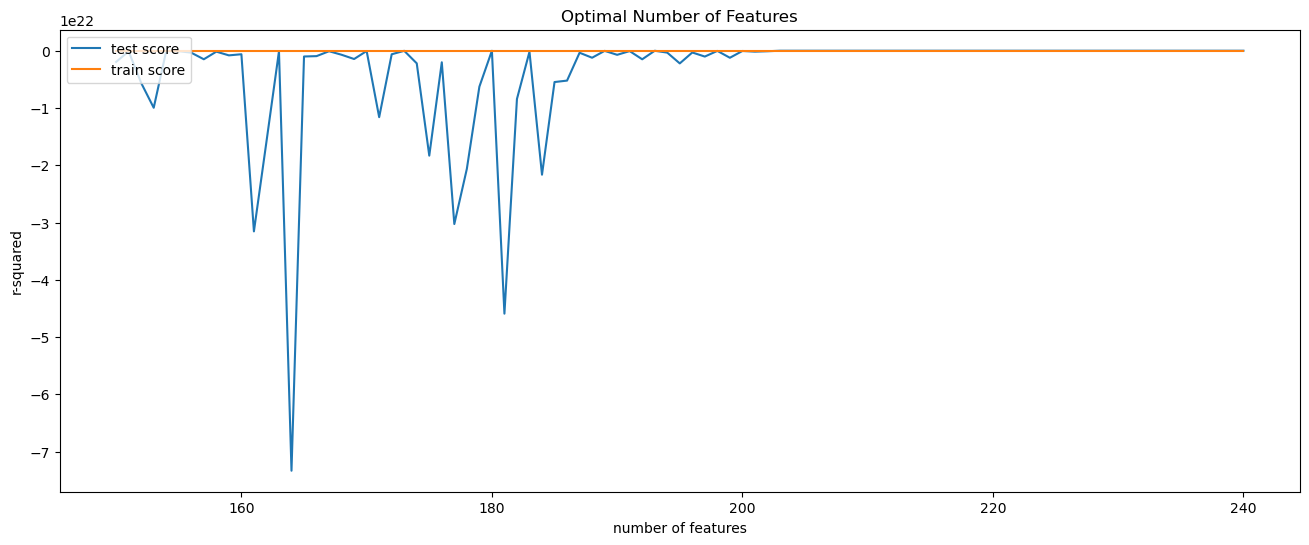

In [291]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [292]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(50, 150))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv2 = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv2.fit(X_train, y_train)                  


Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [50, 51, 52, 53, 54, 55, 56,
                                                   57, 58, 59, 60, 61, 62, 63,
                                                   64, 65, 66, 67, 68, 69, 70,
                                                   71, 72, 73, 74, 75, 76, 77,
                                                   78, 79, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [293]:
# cv results
cv_results2 = pd.DataFrame(model_cv2.cv_results_)
cv_results2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.597851,1.789213,0.014361,2.130401e-02,50,{'n_features_to_select': 50},6.831363e-01,0.613414,-1.756967e+22,7.755716e-01,...,-3.513934e+21,7.027868e+21,42,0.807748,0.856279,0.667387,0.828005,0.839339,0.799752,0.068037
1,2.491335,2.540836,0.002792,3.984216e-04,51,{'n_features_to_select': 51},6.831363e-01,0.613414,-1.989544e+20,7.731150e-01,...,-3.979088e+19,7.958176e+19,6,0.807748,0.856279,0.725293,0.828164,0.839598,0.811416,0.045865
2,1.198781,0.024184,0.002991,6.305254e-04,52,{'n_features_to_select': 52},-3.636642e+19,0.613414,-1.543929e+19,7.731150e-01,...,-1.036114e+19,1.431169e+19,3,0.807769,0.856279,0.728166,0.828164,0.839935,0.812062,0.044829
3,2.467606,1.841087,0.007181,8.400534e-03,53,{'n_features_to_select': 53},-4.573334e+19,0.613723,-7.218415e+20,7.727557e-01,...,-1.535150e+20,2.847148e+20,14,0.811046,0.856324,0.725941,0.828186,0.840043,0.812308,0.045650
4,1.809156,1.215897,0.009973,1.300532e-02,54,{'n_features_to_select': 54},-1.659215e+19,0.613697,-2.284549e+19,7.727557e-01,...,-7.887528e+18,9.860531e+18,2,0.811382,0.856324,0.766325,0.828186,0.840097,0.820463,0.030804
5,1.867204,1.384807,0.003590,7.979516e-04,55,{'n_features_to_select': 55},-4.958312e+19,0.613697,-7.121046e+21,7.724759e-01,...,-1.434126e+21,2.843525e+21,31,0.811665,0.856324,0.756665,0.828258,0.841171,0.818817,0.034379
6,2.476576,1.723288,0.009772,1.406631e-02,56,{'n_features_to_select': 56},-4.233952e+19,0.614009,-8.368486e+20,7.715209e-01,...,-1.758376e+20,3.309120e+20,15,0.811787,0.856330,0.778130,0.828347,0.841717,0.823262,0.026939
7,1.216743,0.011370,0.003190,1.162892e-03,57,{'n_features_to_select': 57},-2.193265e+19,0.614009,-6.190884e+20,7.736880e-01,...,-1.282042e+20,2.455891e+20,11,0.812147,0.856330,0.779103,0.829711,0.842687,0.823996,0.026771
8,2.921784,2.094148,0.009177,9.388074e-03,58,{'n_features_to_select': 58},-2.205220e+19,0.614017,-1.487014e+21,7.736546e-01,...,-3.018132e+20,5.926619e+20,18,0.812152,0.856330,0.779841,0.829722,0.842739,0.824157,0.026531
9,2.826040,1.593469,0.012241,1.608572e-02,59,{'n_features_to_select': 59},6.878772e-01,0.614017,-1.454454e+19,7.736546e-01,...,-2.908908e+18,5.817817e+18,1,0.812152,0.856330,0.805227,0.829722,0.842911,0.829269,0.018919


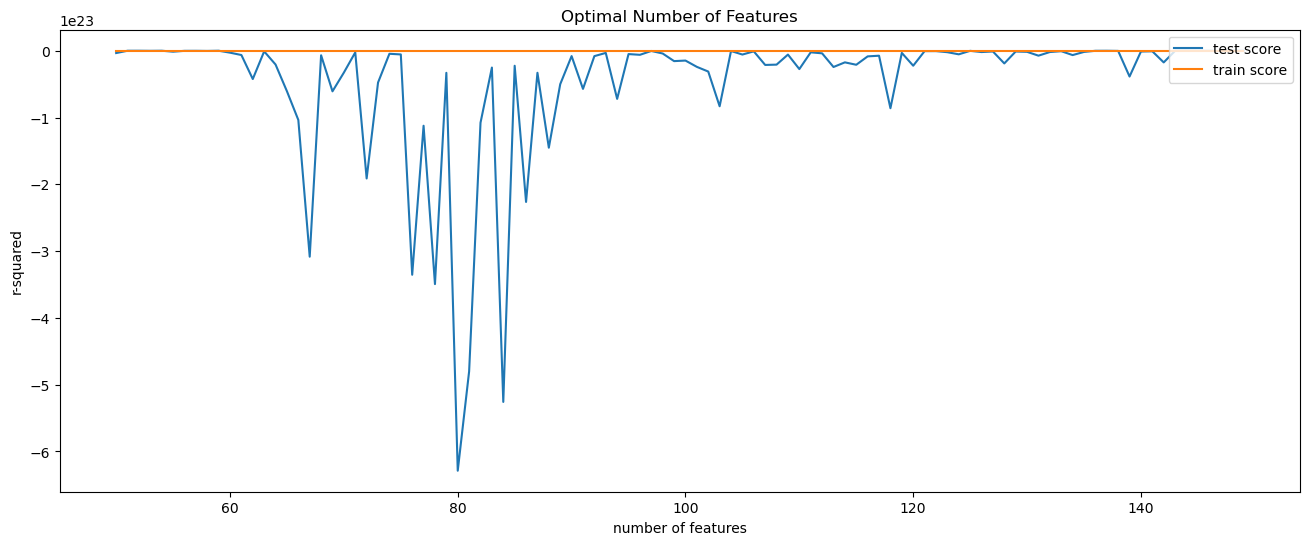

In [294]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results2["param_n_features_to_select"], cv_results2["mean_test_score"])
plt.plot(cv_results2["param_n_features_to_select"], cv_results2["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [295]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 51))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv3 = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv3.fit(X_train, y_train)                  


Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [296]:
# cv results
cv_results3 = pd.DataFrame(model_cv3.cv_results_)
cv_results3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.455630,2.236429,0.002992,6.468134e-07,1,{'n_features_to_select': 1},-0.002019,-0.061887,4.789071e-03,-0.001474,...,-2.079223e-02,2.675268e-02,13,0.004639,0.029959,0.090530,0.021642,0.028189,0.034992,0.029174
1,2.717970,2.574122,0.004188,1.596977e-03,2,{'n_features_to_select': 2},0.003571,-0.500383,4.767634e-02,-0.001474,...,-1.126493e-01,2.009522e-01,16,0.036883,0.068149,0.104954,0.026901,0.041954,0.055768,0.028119
2,3.712574,3.731962,0.005385,3.128663e-03,3,{'n_features_to_select': 3},0.007523,-0.522878,7.146902e-02,-0.001474,...,-1.111476e-01,2.140010e-01,15,0.066360,0.094781,0.108192,0.042117,0.044629,0.071216,0.026456
3,5.359864,3.567163,0.007380,1.739036e-03,4,{'n_features_to_select': 4},0.191486,-0.523022,7.335290e-02,0.060564,...,-4.955949e-02,2.487989e-01,14,0.355795,0.099329,0.108975,0.102793,0.106379,0.154654,0.100623
4,4.026630,3.088204,0.006383,2.239454e-03,5,{'n_features_to_select': 5},0.191486,-0.276036,7.335290e-02,0.060922,...,5.068385e-03,1.564742e-01,12,0.355795,0.188302,0.108975,0.107198,0.121094,0.176273,0.094571
5,3.037077,2.734586,0.003790,9.765907e-04,6,{'n_features_to_select': 6},0.391832,-0.066059,7.234586e-02,0.093211,...,9.413756e-02,1.599592e-01,11,0.482898,0.337159,0.109637,0.122431,0.121094,0.234644,0.150500
6,1.282768,0.039811,0.002792,1.163391e-03,7,{'n_features_to_select': 7},0.468470,0.005355,7.205413e-02,0.100274,...,1.278181e-01,1.749866e-01,10,0.527122,0.384371,0.109804,0.127297,0.142728,0.258264,0.167767
7,2.538204,1.963347,0.011775,1.756133e-02,8,{'n_features_to_select': 8},0.474541,0.034631,7.205413e-02,0.097085,...,1.384266e-01,1.705212e-01,6,0.534238,0.392019,0.109804,0.141174,0.148426,0.265132,0.168304
8,2.552772,2.564984,0.003191,9.772237e-04,9,{'n_features_to_select': 9},0.480757,-0.015468,7.205413e-02,0.097085,...,1.296501e-01,1.800717e-01,8,0.535850,0.395751,0.109804,0.141174,0.148426,0.266201,0.169385
9,1.294537,0.037386,0.002393,4.885002e-04,10,{'n_features_to_select': 10},0.478544,-0.014984,7.205413e-02,0.097085,...,1.289083e-01,1.793874e-01,9,0.539364,0.399541,0.109804,0.141174,0.148426,0.267662,0.171084


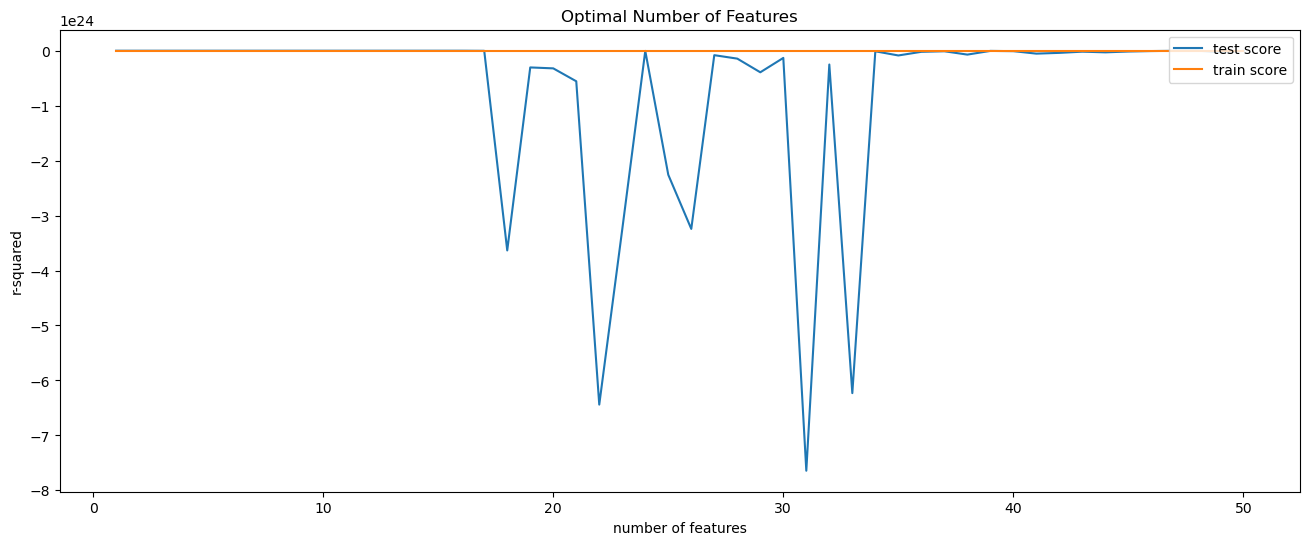

In [297]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results3["param_n_features_to_select"], cv_results3["mean_test_score"])
plt.plot(cv_results3["param_n_features_to_select"], cv_results3["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

### Different means of r2 score for different cross validations is coming out to be 0. So Cross Validation is not that useful here.

## We will try Linear Regression and then Ridge and Lasso

Build the Linear Regression Model

In [298]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [299]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-1421532.6229545446
[-1.12083082e+02  4.19057916e+01  4.69707833e-01  2.09955531e+04
 -8.59454784e+02 -2.23337473e+03 -3.96425608e-05  3.66733279e+03
  7.96838113e+03  5.55616931e+03  2.47113257e+02  1.48961256e+01
  1.83923124e+01  3.95556066e+03 -5.63583789e+03  1.75254016e+01
  5.48381154e+00 -2.53287994e+00  2.04762923e+01 -5.17735509e+02
 -4.37459255e+03  3.41693624e+01  3.60855076e+01 -5.12826719e+01
  1.89722358e+01  1.91755927e+03 -3.22462335e+03  1.82086436e+03
  1.75183246e+03 -3.34803315e+03 -1.26331628e+04  5.09321269e+03
  1.72505097e+03  4.05864768e+03  7.55018309e+03  3.60509915e+01
  5.39147894e+03  7.78106926e+00  1.46806247e+01  1.83506658e+01
 -1.10700790e+01  3.83602377e+01  1.73408947e+01  6.17224494e+02
 -3.34214915e+00  1.46002266e+02  3.39285872e+02  2.23006595e+03
  2.78466905e+04  2.04998984e+04  2.51773501e+04  2.05646089e+04
 -1.98225190e+03 -1.76524668e+03  7.96652796e+03 -2.76693985e+03
 -1.73605954e+04  3.30370314e+02  2.21425975e+04  1.06448169e+04
  1.0

In [300]:
#Calculate R2 score, Residual Sum of Squares , Mean_Squared_Error for test and train data
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9363809656089837
0.7332849759982698
375976384619.4174
852795615063.1681
370785389.1710231
1960449689.8003864


## Ridge and Lasso Regression
Lets see the impact of regularization on the coefficients, using Ridge and Lasso

## Ridge Regression

In [301]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [302]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20}


#### According to Ridge, alpha value of 20 seems to best fit. We can check the coefficients for the variables

In [303]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.32001711e+02  7.15361470e+01  4.35422786e-01  2.71525886e+03
 -2.16454840e+03 -1.69633907e+03  0.00000000e+00  3.03737965e+03
  9.86188202e+03  5.74147469e+03  2.43402559e+02  1.08496617e+01
  2.46989704e+01  6.39507834e+03 -5.09617532e+03  2.09726614e+01
  5.27558199e+00 -2.00529166e+00  2.42429518e+01 -4.83348159e+01
 -1.95915570e+03  1.90094025e+01  2.97784874e+01 -1.40595982e+01
  3.47282919e+01  1.07542105e+03 -3.39968334e+03  5.43032027e+02
  1.57998268e+03 -4.73417044e+03 -7.67478954e+03  5.22449162e+03
  9.11932346e+02  4.77803124e+03  4.55839621e+03  6.97995029e+01
  5.64359288e+03  7.80939445e+00  1.55279430e+01  2.86985397e+01
 -4.76421280e+00  2.59513470e+01  3.08079544e+01  1.02695884e+02
 -1.48125770e+00  2.09033666e+02  3.36434473e+02  3.32007216e+03
  3.19581016e+03 -6.13738590e+02  3.18841790e+03 -1.30938503e+03
  1.61350529e+03 -9.71836526e+01  5.59805252e+03 -1.23908892e+03
 -1.74637500e+03  7.47718226e+02  8.18271310e+02  1.22803665e+03
  6.14625231e+03 -4.69883

In [304]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_score_train    :  '+ str(r2_train_lr))
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_score_test     :  '+str(r2_test_lr))
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS_train         :  '+ str(rss1_lr))
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS_test          :  '+ str(rss2_lr))
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE_train         :  '+ str(mse_train_lr))
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE_test          :  '+ str(mse_test_lr))
metric2.append(mse_test_lr**0.5)

r2_score_train    :  0.921229841583426
r2_score_test     :  0.6863152914107815
RSS_train         :  465516643892.1036
RSS_test          :  1002976660195.6322
MSE_train         :  459089392.3985242
MSE_test          :  2305693471.714097


## Lasso

In [305]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [306]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


#### According to Lasso, alpha value of 100 seems to best fit. We can check the coefficients for the variables

In [307]:
#Fitting Lasso model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
print(lasso.coef_)

[-1.23898174e+02  7.96429307e+01  4.05644629e-01  0.00000000e+00
 -1.63584334e+03 -5.13193145e+02  0.00000000e+00  2.01885062e+03
  9.47387349e+03  5.66064338e+03  2.50029392e+02  1.12372382e+01
  1.99437753e+01  6.21678322e+03 -4.62372604e+03  3.30025310e+01
  1.65559588e+01  1.15700790e+01  8.86837799e+00 -0.00000000e+00
 -1.80323829e+02  4.60477960e+01  5.25034797e+01  1.44586514e+01
  8.30637287e+00  5.98046596e+02 -2.85498726e+03  0.00000000e+00
  5.76574001e+02 -4.54278133e+03 -9.31142707e+03  4.97612637e+03
  1.02308562e+03  4.69459637e+03  4.07237763e+03  9.02313770e+01
  4.90670359e+03  7.75380813e+00  1.44894680e+01  2.91052415e+01
 -8.68155861e+00  2.29827894e+01  3.06057821e+01  1.02403346e+02
 -1.95510024e+00  1.53586796e+02  3.88622355e+02  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  1.92123276e+03 -8.72407697e+02
  0.00000000e+00  0.00000000e+00  6.76839510e+03 -0.00000000e+00
 -0.00000000e+00  5.66817941e+02  0.00000000e+00  0.00000000e+00
  8.49948112e+03 -0.00000

In [308]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_score_train    :  '+ str(r2_train_lr))
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_score_test     :  '+ str(r2_test_lr))
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS_train         :  '+ str(rss1_lr))
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS_test          :  '+ str(rss2_lr))
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE_train         :  '+ str(mse_train_lr))
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE_train         :  '+ str(mse_test_lr))
metric3.append(mse_test_lr**0.5)

r2_score_train    :  0.9212087318548419
r2_score_test     :  0.7005309516932681
RSS_train         :  465641398370.21454
RSS_test          :  957523454852.1882
MSE_train         :  459212424.42821944
MSE_train         :  2201203344.487789


In [309]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.363810e-01,9.212298e-01,9.212087e-01
1,R2 Score (Test),7.332850e-01,6.863153e-01,7.005310e-01
2,RSS (Train),3.759764e+11,4.655166e+11,4.656414e+11
3,RSS (Test),8.527956e+11,1.002977e+12,9.575235e+11
4,MSE (Train),1.925579e+04,2.142637e+04,2.142924e+04
5,MSE (Test),4.427697e+04,4.801764e+04,4.691698e+04


##### Observation -
Linear regression resulted in high Train and test R2 score. and then Lasso has better R2 score for Test set.

## Lets observe the changes in the coefficients after regularization

In [310]:
betas = pd.DataFrame(index=X.columns)

In [311]:
betas.rows = X.columns

In [312]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [313]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
MSSubClass,-112.083082,-132.001711,-123.898174
LotFrontage,41.905792,71.536147,79.642931
LotArea,0.469708,0.435423,0.405645
Street,20995.553053,2715.258862,0.000000
LotShape,-859.454784,-2164.548396,-1635.843338
LandContour,-2233.374735,-1696.339066,-513.193145
Utilities,-0.000040,0.000000,0.000000
LandSlope,3667.332791,3037.379651,2018.850620
OverallQual,7968.381135,9861.882019,9473.873486
OverallCond,5556.169314,5741.474690,5660.643377


#### both Ridge and Lasso are pushing the coefficients towards 0.


#### Since there are a lot of variables and Lasso has some coefficients 0. We can make use of Lasso in feature selection and keeping the model simple.

## <font color='green'> So our choice of Model is lasso in this case.
</font>

In [314]:
betas.Lasso.sort_values(ascending=False)

Neighborhood_StoneBr       26727.178936
SaleType_New               20795.814026
Neighborhood_NoRidge       19217.175490
Neighborhood_NridgHt       19161.278323
Neighborhood_Crawfor       16870.626518
BsmtExposure_Gd            14959.924719
RoofMatl_WdShngl           13515.365012
Exterior1st_BrkFace        11022.811784
OverallQual                 9473.873486
Neighborhood_BrkSide        8499.481118
Exterior2nd_ImStucc         7922.738048
Neighborhood_Somerst        7789.523828
Condition1_Norm             6787.502753
LotConfig_CulDSac           6768.395101
ExterQual                   6216.783219
SaleCondition_Normal        6030.610155
OverallCond                 5660.643377
KitchenQual                 4976.126367
GarageCars                  4906.703592
Functional                  4694.596375
Fireplaces                  4072.377632
MasVnrType_None             4007.314425
Exterior1st_CemntBd         3844.437860
HouseStyle_SLvl             3207.336823
FireplaceQu_NoFirePlace     2605.564465


### Top 5 significant variables in predicting the price of the house-
1. Neighborhood_StoneBr &emsp; Stone Brook neighbourhood
2. SaleType_New &emsp; Home just constructed and sold
3. Neighborhood_NoRidge &emsp; Northridge neighbourhood
4. Neighborhood_NridgHt &emsp; Northridge Heights neighbourhood
5. BsmtQual_Gd &emsp; Basement height -Good (90-99 inches)


### Company can use this model to predict the actual values and buy them at a lower price than what the model has predicted.

They can either go with variables with stong + coefficients, like Stonebrook, Northridge, Northridge heights neighbourhood, Newly constructed homes. 
And with Strong -ve coefficients - like Height of basement between 80 to 99 inches, Kitchens above grade, Roof material Grave and Tar.
Business can make decision according to the coefficients, like if Roof material is Grave and Tar, they can buy it a very low cost highlighting the material, probably if they find in a good neightbourhood,and sell it at higher price by highlighting the good neighbour feature.
There are 105/240 variables that according to lasso will impact the SalePrice of the house.



In [315]:
# We see 135 coefficients have been eliminated by Lasso.
print('Coefficients with 0 :')
print((betas.Lasso.values == 0 ).sum())


print('Postitive Coefficients :')
print((betas.Lasso.values > 0).sum())


print('Negative Coefficients :')
print((betas.Lasso.values < 0).sum())

Coefficients with 0 :
135
Postitive Coefficients :
65
Negative Coefficients :
40


## Solving Part II of the assignment

# Impact of doubling the optimal alpha values in ridge and lasso

Optimal value of alpha for Ridge has 20
<br>Optimal value of alpha for Lasso has 100

#### Impact on Ridge

In [316]:
#If alpha is doubed to 40 for ridge
alpha = 40
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.31904431e+02  6.64870725e+01  4.29685726e-01  1.55419563e+03
 -2.17867503e+03 -1.60578429e+03  0.00000000e+00  1.90795640e+03
  1.01215089e+04  5.52180239e+03  2.48896905e+02  1.51281698e+01
  2.63542436e+01  6.59757006e+03 -4.62583717e+03  2.17969494e+01
  3.64885878e+00 -1.33200306e+00  2.41138053e+01  2.63119317e+02
 -1.57264792e+03  1.99859148e+01  2.95486461e+01 -1.45267345e+01
  3.50078264e+01  9.42668220e+02 -2.76660404e+03  8.47893460e+01
  1.34323870e+03 -5.01180056e+03 -5.32222919e+03  5.18666577e+03
  6.97382740e+02  4.66935416e+03  3.53407373e+03  7.08237125e+01
  4.78328183e+03  1.12912040e+01  1.63689556e+01  2.91653552e+01
 -5.56837753e+00  2.34007971e+01  3.16111580e+01  9.80443797e+01
 -1.60895513e+00  2.10010859e+02  2.88294887e+02  3.28523223e+03
  2.04742705e+03 -5.48472763e+02  2.51080838e+03 -1.50369763e+03
  1.44274220e+03 -1.25335887e+02  4.17904926e+03 -9.41623956e+02
 -8.79619338e+02  4.99550399e+02  4.02916393e+02  5.90667391e+02
  4.85013899e+03 -2.74103

In [317]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_score_train    :  '+ str(r2_train_lr))
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_score_test     :  '+str(r2_test_lr))
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS_train         :  '+ str(rss1_lr))
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS_test          :  '+ str(rss2_lr))
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE_train         :  '+ str(mse_train_lr))
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE_test          :  '+ str(mse_test_lr))
metric2.append(mse_test_lr**0.5)

r2_score_train    :  0.9163469165400786
r2_score_test     :  0.6791698110925273
RSS_train         :  494373801529.57623
RSS_test          :  1025823645684.1133
MSE_train         :  487548127.74119943
MSE_test          :  2358215277.4347434


#### Impact on Lasso

In [318]:
#Doubling alpha to 200 for lasso

alpha =200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
print(lasso.coef_)

[-1.32942783e+02  6.13327755e+01  4.29752584e-01  0.00000000e+00
 -1.60083245e+03 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.03144919e+04  5.21329398e+03  2.66713754e+02  1.67502606e+01
  2.17996456e+01  7.41946162e+03 -4.74410929e+03  3.34979419e+01
  1.22363738e+01  1.21355379e+01  9.01011176e+00  1.25250439e+02
 -0.00000000e+00  4.74704964e+01  5.47766191e+01  1.58131425e+01
  8.55747586e+00  2.62327360e+02 -1.76741301e+03 -0.00000000e+00
  0.00000000e+00 -5.15947027e+03 -5.80699209e+03  4.98589269e+03
  5.95856070e+02  4.67865324e+03  2.15585787e+03  8.82100311e+01
  3.85027508e+03  1.17301870e+01  1.68834112e+01  3.02553710e+01
 -8.95207121e+00  2.11197102e+01  3.20403935e+01  9.46436454e+01
 -2.44658889e+00  1.45427601e+02  3.40637488e+02  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -1.40361035e+03
  0.00000000e+00  0.00000000e+00  3.61913674e+03 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.45926224e+03 -0.00000

In [319]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_score_train    :  '+ str(r2_train_lr))
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_score_test     :  '+ str(r2_test_lr))
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS_train         :  '+ str(rss1_lr))
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS_test          :  '+ str(rss2_lr))
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE_train         :  '+ str(mse_train_lr))
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE_train         :  '+ str(mse_test_lr))
metric3.append(mse_test_lr**0.5)

r2_score_train    :  0.9141500574486914
r2_score_test     :  0.690076457502834
RSS_train         :  507356820630.77014
RSS_test          :  990950693668.8806
MSE_train         :  500351894.1131855
MSE_train         :  2278047571.6525993


#### Chosing next top predictors if current top 5 are not available

In [320]:
#We will first drop the top 5 predictors-
#1. Neighborhood_StoneBr &emsp; Stone Brook neighbourhood
#2. SaleType_New &emsp; Home just constructed and sold
#3. Neighborhood_NoRidge &emsp; Northridge neighbourhood
#4. Neighborhood_NridgHt &emsp; Northridge Heights neighbourhood
#5. BsmtQual_Gd &emsp; Basement height -Good (90-99 inches)

X_train_Notop5=X_train.drop(['Neighborhood_StoneBr','SaleType_New','Neighborhood_NoRidge','Neighborhood_NridgHt','BsmtQual_Gd'], axis =1)
X_test_Notop5=X_test.drop(['Neighborhood_StoneBr','SaleType_New','Neighborhood_NoRidge','Neighborhood_NridgHt','BsmtQual_Gd'], axis =1)

In [321]:
print(X_train.shape)
X_train_Notop5.shape

(1014, 240)


(1014, 235)

In [322]:
print(X_test.shape)
X_test_Notop5.shape

(435, 240)


(435, 235)

In [323]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_Notop5, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [324]:
print(model_cv.best_params_)

{'alpha': 100}


In [325]:
#Still the alpha value remains 100 as a best fit
#Fitting Lasso model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_Notop5, y_train) 
print(lasso.coef_)

[-1.24153479e+02  9.40323353e+01  4.08095831e-01  0.00000000e+00
 -1.57858993e+03 -7.80152239e+02  0.00000000e+00  2.14189569e+03
  1.05857240e+04  5.06217252e+03  2.40111909e+02 -9.38747565e+00
  3.00008434e+01  7.92853740e+03 -6.02185602e+03  3.57294044e+01
  1.76116553e+01  1.05605297e+01  8.00091093e+00 -0.00000000e+00
 -9.34272665e+01  4.83361236e+01  5.40421332e+01  8.61488183e+00
  8.45581488e+00  1.57311052e+02 -3.13812635e+03  0.00000000e+00
  2.36701805e+02 -5.30677274e+03 -9.07785292e+03  6.07259454e+03
  1.16115231e+03  5.07190849e+03  3.00209414e+03  8.98238563e+01
  4.24185387e+03  1.41244574e+01  1.63501406e+01  3.08437413e+01
 -1.21939112e+01  2.09129394e+01  2.81094574e+01  1.03277973e+02
 -1.64624436e+00  1.58807668e+02  5.29294195e+02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  4.88194844e+03 -0.00000000e+00
  9.23671150e+02 -0.00000000e+00  6.60003687e+03 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  8.32587799e+03 -5.96767

In [326]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_Notop5)
y_pred_test = lasso.predict(X_test_Notop5)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_score_train    :  '+ str(r2_train_lr))
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_score_test     :  '+ str(r2_test_lr))
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS_train         :  '+ str(rss1_lr))
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS_test          :  '+ str(rss2_lr))
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE_train         :  '+ str(mse_train_lr))
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE_train         :  '+ str(mse_test_lr))
metric3.append(mse_test_lr**0.5)

r2_score_train    :  0.9143538561289948
r2_score_test     :  0.6687786346758333
RSS_train         :  506152409219.2461
RSS_test          :  1059048432014.286
MSE_train         :  499164111.65606123
MSE_train         :  2434594096.5845656


In [327]:
ridge = Ridge()
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_Notop5, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [328]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 50}


In [329]:
#For ridge the best fit alpha has cahnged from 20 to 50
alpha = 50
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_Notop5, y_train)
print(ridge.coef_)

[-1.34349799e+02  7.53430659e+01  4.10112865e-01  1.35281889e+03
 -1.83705107e+03 -1.52901303e+03  0.00000000e+00  1.61389018e+03
  1.04940420e+04  5.17688362e+03  2.19456874e+02  1.27308678e+01
  3.17039225e+01  7.28587477e+03 -4.84620367e+03  2.30664215e+01
  1.89863960e+00 -1.23133092e+00  2.37337303e+01  4.63466204e+02
 -1.55013391e+03  2.07928645e+01  2.89517992e+01 -1.47640312e+01
  3.49806325e+01  6.48210145e+02 -2.51405921e+03 -4.35747788e+02
  1.33137728e+03 -5.46043215e+03 -4.49150334e+03  5.70395005e+03
  8.88700162e+02  4.76176168e+03  3.16973374e+03  7.07778422e+01
  3.89801575e+03  1.68642943e+01  1.72249655e+01  3.16468337e+01
 -8.93713418e+00  2.06309232e+01  2.96573357e+01  9.72073819e+01
 -1.46766944e+00  2.05406972e+02  2.97241809e+02  3.23647055e+03
  1.24846259e+03 -4.54161445e+02  2.68625036e+03 -1.20721336e+03
  1.45131767e+03 -3.04142689e+02  3.59241364e+03 -8.37861082e+02
 -4.45909519e+02  2.27908204e+02  2.69267192e+02  6.52917536e+02
  4.70212703e+03 -2.31794

In [330]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_Notop5)
y_pred_test = ridge.predict(X_test_Notop5)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_score_train    :  '+ str(r2_train_lr))
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_score_test     :  '+str(r2_test_lr))
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS_train         :  '+ str(rss1_lr))
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS_test          :  '+ str(rss2_lr))
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE_train         :  '+ str(mse_train_lr))
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE_test          :  '+ str(mse_test_lr))
metric2.append(mse_test_lr**0.5)

r2_score_train    :  0.9090119324556568
r2_score_test     :  0.6637763012000507
RSS_train         :  537722161398.6048
RSS_test          :  1075042911774.8391
MSE_train         :  530297989.54497516
MSE_test          :  2471363015.5743427


In [331]:
#Lasso R2 score is still better than Ridge and feature selection is also there. so we will pick the next top 5 from Lasso
X_Notop5=X.drop(['Neighborhood_StoneBr','SaleType_New','Neighborhood_NoRidge','Neighborhood_NridgHt','BsmtQual_Gd'], axis =1)
betas = pd.DataFrame(index=X_Notop5.columns)
betas['Lasso'] = lasso.coef_

In [332]:
betas.Lasso.sort_values(ascending=False)

SaleCondition_Partial      22086.756269
BsmtExposure_Gd            13341.539295
Neighborhood_Crawfor       12592.333941
OverallQual                10585.723969
BsmtQual_NoBsmnt           10462.630794
Exterior2nd_ImStucc         8553.274675
Neighborhood_BrkSide        8325.877992
RoofMatl_WdShngl            8299.080737
Condition1_Norm             8233.925744
Exterior1st_BrkFace         7988.820890
ExterQual                   7928.537403
LotConfig_CulDSac           6600.036868
MasVnrType_None             6373.777116
KitchenQual                 6072.594541
SaleCondition_Normal        5195.742897
Functional                  5071.908491
OverallCond                 5062.172516
MSZoning_RL                 4881.948445
GarageCars                  4241.853868
BsmtFinType1_Unf            3919.541494
MasVnrType_Stone            3521.129068
Fireplaces                  3002.094143
Foundation_PConc            2968.924321
RoofStyle_Hip               2463.074789
GarageType_BuiltIn          2456.481501


### Next top5 features

SaleCondition_Partial-------------------22086.756269
<br>BsmtExposure_Gd-------------------13341.539295
<br>RoofMatl_Tar&Grv--------------------12837.888321
<br>Neighborhood_Timber-------------------(-12317.583955)
<br>Neighborhood_Crawfor------------------(-12592.333941)

